In [1]:
import numpy as np
y = lambda x: np.sin(x)*np.exp(-1/2*x)
    
a = 0.1
b = 6
while abs(b-a) > 1e-9:
    xmid = (a+b)/2
    if np.sign(y(xmid)) == np.sign(y(a)):
        a = xmid
    else:
        b = xmid
    
print(f'x = {xmid}')

import sympy as sp
x = sp.Symbol("x")
y = sp.Eq(sp.sin(x)*sp.exp(-1/2*x),0)
(sp.solveset(y,x))

x = 3.1415926538989876


Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [5]:
y = lambda x: np.sin(x)*np.exp(-1/2*x)
yp = lambda x: np.exp(-1/2 * x)*(np.cos(x)-1/2*np.sin(x))

x = 1.5
c = 0
while abs(y(x))>1e-4:
    x-= y(x)/yp(x)
    c+=1
    if c> 1000:
        print("    ")
        break
print(x)

3.1415789876967075


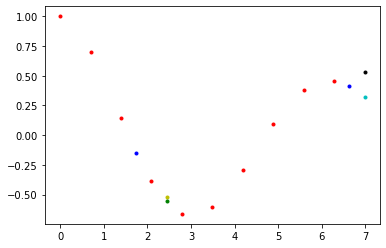

In [22]:
from matplotlib import pyplot as plt
x,h = np.linspace(0,np.pi*2,10, retstep = True)
y = np.cos(x)*np.exp(-1/8*x)

plt.plot(x,y,'r.')

yLinInt = y[3]+1/2 * (y[4]-y[3])
plt.plot(x[3]+1/2*h,yLinInt,'y.')

yLinExt = 2*y[-1]-y[-2]
plt.plot(x[-1]+h,yLinExt,'k.')

yQuadInt1 = 1/8*(3*y[2]+6*y[3]-y[4])
plt.plot(x[2]+1/2*h, yQuadInt1,'b.')

yQuadInt2 = 1/8 * (-y[2]+6*y[3]+3*y[4])
plt.plot(x[3]+1/2*h,yQuadInt2,'g.')

yQuadExt1 = y[-3]-3*y[-2]+3*y[-1]
plt.plot(x[-1]+h,yQuadExt1,'c.')

yQuadExt2 = 1/8 * (3*y[-3]-10*y[-2]+15*y[-1])
plt.plot(x[-1]+1/2*h, yQuadExt2,'b.')

# Extrapolation and Interpolation

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/extrapolation_interpolation.ipynb)

By now we should be comfortable with representing mathematical functions on discrete grids. For example, the plot below is the location of a projectile as it flies through the air at 11 discrete points in time (red dots).  There will be times when we want to find good values of a function _between_ grid points (blue dot) or _beyond_ the last grid point (green dot).  The former is called interpolation and the latter is called extrapolation. In this chapter we will learn how to do both.

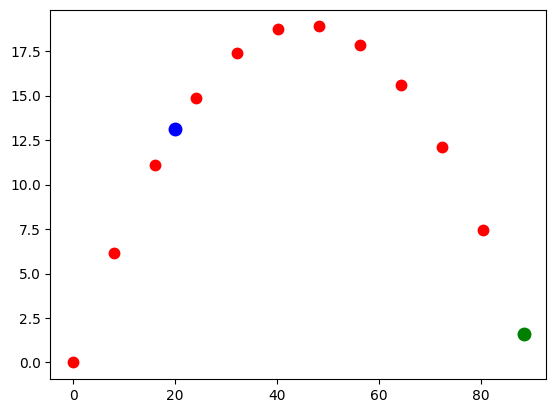

In [1]:
#| echo: false
#| fig-cap: The trajectory of a particle at a discrete set of times.

from matplotlib import pyplot as plt
from numpy import linspace,sin,cos,pi
vi = 30
θ = 40 * pi/180
t,dt = linspace(0,3.5,11,retstep = True)
x = vi * cos(θ) * t 
y = vi * sin(θ) * t - 4.9 * t**2
xf = lambda t: vi * cos(θ) * t
yf = lambda t: vi * sin(θ) * t - 4.9 * t**2

plt.plot(x,y,'r.',ms = 15)
plt.plot([xf(t[2] + dt/2)],[yf(t[2] + dt/2)],'b.',ms = 18)
plt.plot([xf(t[-1] + dt)],[yf(t[-1] + dt)],'g.',ms = 18)


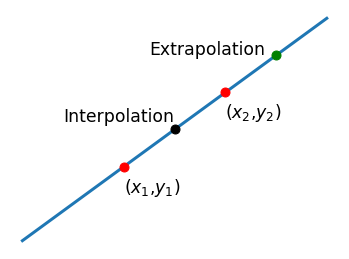

In [1]:
#| echo: false
#| layout-ncol: 1
#| fig-cap: Illustration of linear interpolation/extrapolation.  The red dots are the known function values.  The lack dot is an interpolation and the green dot is an extrapolation.
from matplotlib import pyplot as plt
from numpy import linspace,sin,cos,pi

x = linspace(0,6,10)
y = 5 * x

plt.figure(figsize = (6,4.5))
plt.plot(x,y,lw = 3)
plt.plot([2,4],[10,20],'r.',ms = 18)
plt.plot([3],[15],'k.',ms = 18)
plt.plot([5],[25],'g.',ms = 18)
plt.axis("off")
plt.text(2,6.5,r"($x_1$,$y_1$)",size = "xx-large")
plt.text(4,16.5,r"($x_2$,$y_2$)",size = "xx-large")
plt.text(0.8,16,"Interpolation",size = "xx-large")
plt.text(2.5,25,"Extrapolation",size = "xx-large")
plt.show()

 The formula for a straight line that passes through these two points is 
$$
y-y_1 = { (y_2-y_1) \over (x_2-x_1) } (x-x_1)
$$
Solving this for $y$ gives 
$$
y(x) = y_1 + { (y_2-y_1) \over (x_2-x_1) } (x-x_1)
$$ {#eq-linear}

This function provides a good approximation to the true function $y(x)$ in the neighborhood of the two data points.
All we have to do is evaluate it for any $x$ we please.  If we evaluate it in between two data points we call it interpolation and if we evaluate it somewhere beyond the last data point we call it extrapolation.

### Linear Interpolation
To linearly interpolate or extrapolate we simply evaluate the equation above at $x$ values between or beyond $x_1$ and $x_2$.


Let's evaluate the function above halfway in between two grid points: $x = x_1 + {1\over 2} (x_2 - x_1)$ $$\begin{align}
y(x_1 + {1\over 2} (x_2 - x_1)) &= y_1 + { (y_2-y_1) \over (x_2-x_1) } (x_1 + {1\over 2} (x_2 - x_1)-x_1) \\
&= y_1 + { (y_2-y_1) (x_2 - x_1) \over 2(x_2-x_1) } \\
&= y_1 + {1\over 2} (y_2-y_1) \\
\end{align}$$

That's a pretty cool result that we can generalize to
$$
y(x_1 + ph) = y_1 + p (y_2-y_1)
$$ {#eq-linear-interp}

where p is a fraction of the grid spacing.

In [2]:
yLinearInterp = y[6] + 1/2 * (y[7]-y[6])
print(yLinearInterp)

21.666666666666664


### Linear Extrapolation

Now let's evaluate the equation above beyond the last grid point at $x_2 + h$ where $h = (x_2 - x_1)$ is the grid spacing.    
$$
\begin{align}
y(x_2 + (x_2 - x_1)) &= y_1 + { (y_2-y_1) \over (x_2-x_1) } (x_2 + (x_2 - x_1)-x_1) \\
&= y_1 + { (y_2-y_1) (2x_2 - 2x_1) \over (x_2-x_1) } \\
&= y_1 + 2 (y_2-y_1) \\
&= 2 y_2 - y_1
\end{align}
$$ {#eq-linear-extrapOne}

### Zero Finding

Sometimes you will want to find the x value that produces $y(x) = 0$. We call that finding the zero of the function.  We can do this by setting $y =0$ in (@eq-linear) and solving for x:
$$
\begin{align}
0 &= y_1 + {y_2 - y_1 \over x_2 - x_1} (x - x_1)\\
-y_1 & = {y_2 - y_1 \over x_2 - x_1} (x - x_1)\\
-{y_1 (x_2 - x_1)\over y_2 - y_1} &= x - x_1\\
x_1 - {y_1 (x_2 - x_1)\over y_2 - y_1} &= x \\ 
\end{align} 
$$ {#eq-zero-linear}

## Quadratic Interpolation and Extrapolation
A fancier technique for finding values between and beyond grid points
is to use a parabola instead of a line. It takes three data points to
define a parabola, so we need to start with the function values
$(x_1,y_1)$, $(x_2,y_2)$, and $(x_3,y_3)$, as shown in the figure below.

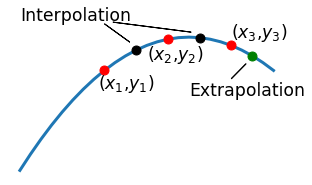

In [3]:
#| echo: false
#| layout-ncol: 1
#| fig-cap: Illustration of quadratic interpolation/extrapolation.  The red dots are the known function values.  Black dots indicate interpolations and the green dot represents extrapolation.
from matplotlib import pyplot as plt
from numpy import linspace,sin,cos,pi

x = linspace(0,6,25)
y = -5 * (x-4)**2
yx = lambda x: -5 * (x-4)**2

plt.figure(figsize = (5,3))
plt.plot(x,y,lw = 3)
plt.plot([2,3.5,5],[yx(2),yx(3.5),yx(5)],'r.',ms = 18)
plt.plot([2.75],[yx(2.75)],'k.',ms = 18)
plt.plot([4.25],[yx(4.25)],'k.',ms = 18)
plt.plot([5.5],[yx(5.5)],'g.',ms = 18)

plt.axis("off")
plt.text(1.85,-30.5,r"($x_1$,$y_1$)",size = "xx-large")
plt.text(3,-13.5,r"($x_2$,$y_2$)",size = "xx-large")
plt.text(5,0,r"($x_3$,$y_3$)",size = "xx-large")
plt.text(0,10,"Interpolation",size = "xx-large")
plt.text(4,-35,"Extrapolation",size = "xx-large")
plt.arrow(2,8,0.6,-11)
plt.arrow(2.2,9,1.85,-6)
plt.arrow(5,-25,0.35,9)

plt.show()

 The general formula for a
parabola is 
$$
y=a + bx + cx^2
$$ {#eq-quadratic} 
where the coefficients $a$, $b,$ and $c$ need to be chosen so that
the parabola passes through our three data points. To determine these
constants, you set up three equations that force the parabola to
match the data points, like this: $$\begin{align}
    y_1 &= a + bx_1 + cx_1^2\\
    y_2 &= a + bx_2 + cx_2^2\\
    y_3 &= a + bx_3 + cx_3^2\\
\end{align}$$


We can solve this system of equations for $a$, $b$, and $c$ and then plug these expressions back into (@eq-quadratic) to get an approximation to the function in the neighborhood of these points.  When we do this (it's long and not super pretty so I'll save you from the gory details) we find the following useful results for interpolating: 
$$
y(x_1 + {1\over 2} h) = {1\over 8} (3 y_1 + 6 y_2 - y_3)
$$ {#eq-quadratic-interpOne}
$$
y(x_2 + {1\over 2} h) = {1\over 8} (- y_1 + 6 y_2 + 3 y_3)
$$  {#eq-quadratic-interpTwo}
and the following useful results for extrapolating 
$$
y(x_3 +  h) =  y_1 - 3 y_2 + 3y_3
$$ {#eq-quadratic-extrapOne}
$$
y(x_3 +  {1\over 2}h) =  {1\over 8}(3 y_1 - 10 y_2 + 15y_3)
$$ {#eq-quadratic-extrapTwo}

## An Example

Let's take the example of the projectile that was mentioned at the beginning of this chapter (shown below again).  The red dots are the known data points and let's try to estimate the height of the projectile between the 3rd and 4th data points in the set (the blue dot) using both linear and quadratic methods.

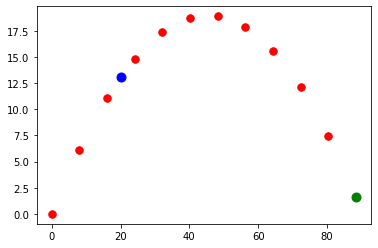

In [4]:
#| echo: false
from matplotlib import pyplot as plt
from numpy import linspace,sin,cos,pi

vi = 30
θ = 40 * pi/180
t,dt = linspace(0,3.5,11,retstep = True)
x = vi * cos(θ) * t 
y = vi * sin(θ) * t - 4.9 * t**2
xf = lambda t: vi * cos(θ) * t
yf = lambda t: vi * sin(θ) * t - 4.9 * t**2

plt.plot(x,y,'r.',ms = 15)
plt.plot([xf(t[2] + dt/2)],[yf(t[2] + dt/2)],'b.',ms = 18)
plt.plot([xf(t[-1] + dt)],[yf(t[-1] + dt)],'g.',ms = 18)


Let's evaluate (@eq-linear-interp) and (@eq-quadratic-interpOne) to perform this interpolation in the cell below.

In [5]:
from numpy import linspace,sin,cos,pi

vi = 30
θ = 40 * pi/180
t = linspace(0,3.5,10)
x = vi * cos(θ) * t 
y = vi * sin(θ) * t - 4.9 * t**2

yInterpLinear = y[2] + 1/2 * (y[3]-y[2])
yInterpQuadratic = 1/8 *(3*y[2] + 6 * y[3] - y[4])
print(yInterpLinear)
print(yInterpQuadratic)

13.931150961536407
14.11641330721542


Notice that the linear and quadratic interpolations are close to the same number but they aren't equal; we wouldn't really expect them to be.  Deciding which interpolation method is the best choice is a case-by-case decision.  For this case, I would favor the quadratic interpolation since the trajectory is more parabolic than linear.  Now let's use the extrapolation formulas to estimate the projectile's height past the last data point.  For the linear case, the second-to-last data point is playing the role of $(x_1,y_1)$ and the last data point is playing the role of $(x_2,y_2)$. For the quadratic case, the third-to-last data point is playing the role of $(x_1,y_1)$, the second-to-last data point is playing the role of $(x_2,y_2)$, and the last data point is playing the role of $(x_3,y_3)$.  Best to use negative indices to index the data arrays for this case.


In [11]:
from numpy import linspace,sin,cos,pi

vi = 30
θ = 40 * pi/180
t = linspace(0,3.5,10)
x = vi * cos(θ) * t 
y = vi * sin(θ) * t - 4.9 * t**2

yExtrapLinear = 2* y[-1] - y[-2]
yExtrapQuadratic = y[-3] - 3 * y[-2] + 3 * y[-1]
print(yExtrapLinear)
print(yExtrapQuadratic)

2.3690482905900723
0.8869495251579806


Now the quadratic and the linear extrapolations differ pretty significantly.  The linear version is a better value in this case due to the very course grid being used here. Finally, let's use (@eq-zero-linear) to estimate the landing location for the projectile.


In [6]:
from numpy import linspace,sin,cos,pi

vi = 30
θ = 40 * pi/180
t = linspace(0,3.5,10)
x = vi * cos(θ) * t 
y = vi * sin(θ) * t - 4.9 * t**2

xRange = x[-2] - y[-2] * (x[-1] - x[-2])/(y[-1] - y[-2])
print(xRange)

93.52444507627926


## Flashcards
1. What is the difference between interpolation and extrapolation?
2. What is the equation for linear interpolation?
3. What is the equation for linear extrapolation?
4. What is the equation(s) for quadratic interpolation?
5. What is the equation(s) for quadratic extrapolation?
6. What is the equation for finding the zeros of a function?
7. Recite Moses 1:39.


## Exercises
<!--1. This exercise is intended to give you practice interpolating, extrapolating, and finding zeros.  Follow the steps below:  
        
  1. Generate an array of $30$ equally-space x values from  $-12 < x < 12$.          
  2. Evaluate the function $y(x) = {\sin(x) \over x}$ on the grid.          
  3. Plot the data points (just the data points; don't connect them).        
  4. Use linear interpolation to estimate the value of the function between the 15th and 16th data point. (the points on either side of the peak.) Then compare to the true function value ($y(0)$) to see how close you got.          
  5. Use **quadratic** interpolation to estimate the value of the function between the 15th and 16th data point. Then compare to the true function value ($y(0)$) to see how close you got.          
  6. Use linear **extrapolation** to estimate the value of the function one grid point beyond the very last data point. Then compare to the true function value to see how close you got.  Reminder/Tip: If you use `linspace` to generate your grid, add `retstep = True` to return the step size along with the array.
  7. Use quadratic **extrapolation** to estimate the value of the function one grid point beyond the very last data point. Then compare to the true function value to see how close you got.          
  8. The function passes through zero between the 11th and 12th data point.  Use the linear zero-finding formula to determine the location of this zero.  Verify that it is close to the right answer by comparing with your plot.  

1 v 0.9717058668410907
1 v 0.9978888858187767
0.020132789906346024 v -0.0013185313814206567
0.020132789906346024 v -0.002543306594999517


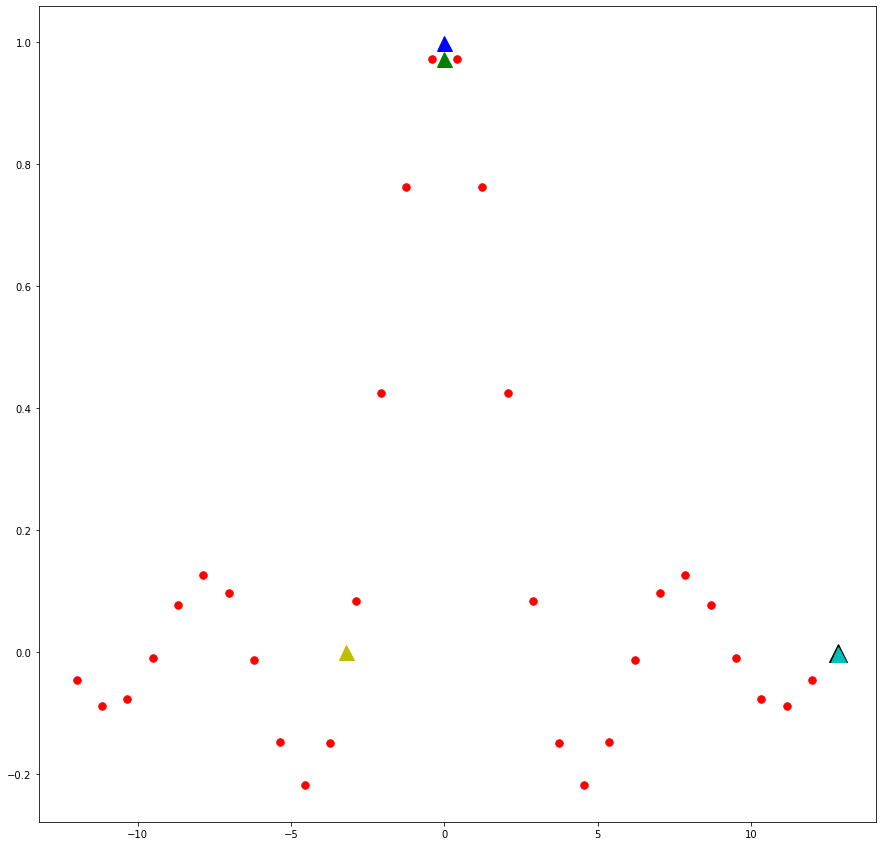

In [10]:
# Solution here
import numpy as np
from matplotlib import pyplot as plt

x,h = np.linspace(-12,12,30,retstep=True)
y = np.sin(x)/x
plt.figure(figsize=(15,15))
plt.plot(x,y,"r.",ms=15)
yLinearInterp = y[14] + 1/2 * (y[15]-y[14])
plt.plot(0,yLinearInterp,"g^",ms=15)
print(1,"v",yLinearInterp)
yQuadInterp = 1/8 *(-y[13] + 6 * y[14] +3* y[15])
plt.plot(0,yQuadInterp,"b^", ms=15)
print(1,"v",yQuadInterp)
yLinExtra = y[-1]*2 - y[-2]
plt.plot(x[-1]+h,yLinExtra,"k^",ms=18)
print(np.sin(x[-1]+h)/(x[-1]+h),"v",yLinExtra)
yQuadExtra = 1/8*(3*y[-3]-10*y[-2]+15*y[-1])
plt.plot(x[-1]+h,yQuadExtra,"c^",ms = 15)
print(np.sin(x[-1]+h)/(x[-1]+h),"v",yQuadExtra)
zero = x[10]-y[10]*(x[11]-x[10])/(y[11]-y[10])
plt.plot(zero,0,"y^",ms=15)

-->
1. In the cell below, you will find the coordinates for a batted baseball flying through the air while experiencing non-negligible air drag. 
    1. Plot the data.
    2. Use the linear zero-finding formula (@eq-zero-linear) to estimate the landing location of the ball.
    3. Use linear interpolation to calculate the height of the projectile between the 2nd and 3rd data point.  Make a visual inspection of the plot to ensure that your interpolation is reasonable.
    4. Use **quadratic** interpolation to calculate the height of the projectile between the 2nd and 3rd data point.  Make a visual inspection of the plot to ensure that your interpolation is reasonable. 

The zero is at 108.51 m
The value between the 2nd and 3rd data point is 21.67.
Using quad interpolation, the value between the 2nd and 3rd data point is 22.14.


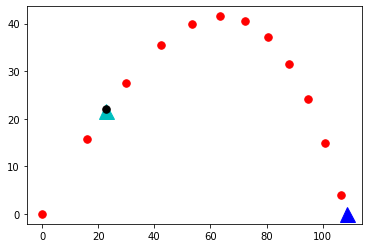

In [20]:
x = [0, 15.805250773081712, 29.98211261814125, 42.526480802646844, 53.54837374010167, 63.375313562732956, 72.28376367575353, 80.43524080501983, 87.9042108343639, 94.71629032437068, 100.88093230888737, 106.41217684263896] 
y = [0, 15.80525077308171, 27.532112618141245, 35.45860314481743, 39.97307745470617, 41.548109055524456, 40.52592795902555, 37.14060411207481, 31.588726752728686, 24.07513301195207, 14.825650490213738, 4.076523019892836]
plt.plot(x,y,'r.',ms=15)
zero = x[-2]-y[-2]*(x[-1]-x[-2])/(y[-1]-y[-2])
plt.plot(zero,0,'b^',ms=15)
print(f'The zero is at {zero:.2f} m')
p = 1/2
yLinInt = y[1]+p*(y[2]-y[1])
plt.plot((x[1]+x[2])/2,yLinInt,'c^',ms=15)
print(f'The value between the 2nd and 3rd data point is {yLinInt:.2f}.')
yQuadInt = 1/8 * (3*y[1]+6*y[2]-y[3])
plt.plot((x[1]+x[2])/2,yQuadInt,'k.',ms=15)
print(f'Using quad interpolation, the value between the 2nd and 3rd data point is {yQuadInt:.2f}.')

2. [This file](https://lancejnelson.github.io/PH135/files/carbondata.txt) contains worldwide carbon emission data from 1958 to 2017. 
    1. Read the data file using any method of your choosing.
    2. Plot the data so you can see what it looks like.
    3. Use linear extrapolation to predict what carbon emissions will be in the year 2030.  
    4. Use quadratic extrapolation to predict what carbon emissions will be in the year 2030.

    Hints:
    1. Remember that our extrapolation formulas assume that the spacing between grid points is equal.  Hence, to extrapolate to 2030, $x_1$ must correspond to 2004 $x_2$ should correspond to $2017$ for the linear extrapolation.
    2. For the quadratic extrapolation, $x_1$ should correspond to 1991, $x_2$ to 2004 and $x_3$ to 2017.  You could pick other years if you like as long as they are spaced out evenly.


Using linear extrapolation, 2030 will have emissions of 435.58 
Using quadratic extrapolation, 2030 will have emissions of 442.70


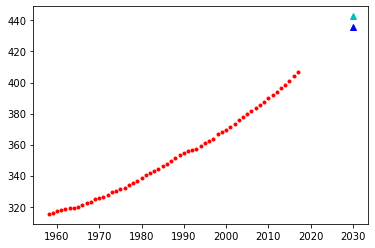

In [32]:
data = np.genfromtxt('carbondata.txt')
plt.plot(data[:,0],data[:,1],'r.')
y = data[:,1]
yLinExt = 2*y[-1]-y[-14]
plt.plot(2030,yLinExt,'b^')
yQuadExt = y[-27]-3*y[-14]+3*y[-1]
plt.plot(2030,yQuadExt,'c^')
print(f'Using linear extrapolation, 2030 will have emissions of {yLinExt:.2f} \nUsing quadratic extrapolation, 2030 will have emissions of {yQuadExt:.2f}')

3. [This file](https://lancejnelson.github.io/PH135/files/temperatureData.txt) contains the change in average global temperature from 1958 to 2017. 
    1. Read the data file using any method of your choosing.
    2. Plot the data so you can see what it looks like.
    3. Use linear extrapolation to predict what average global temperature change will be in the year 2030 if this trend continues.  
    4. Use quadratic extrapolation to predict what average global temperature change will be in the year 2030 if this trend continues.

Linear Ext: 1.27
Quad Ext: 1.52


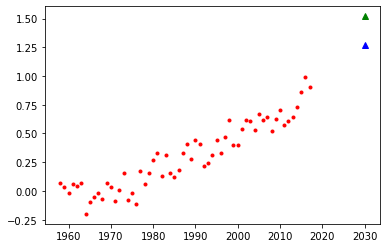

In [34]:
data = np.genfromtxt('temperatureData.txt')
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'r.')
yLinExt = 2*y[-1]-y[-14]
plt.plot(2030,yLinExt,'b^')
yQuadExt = y[-27]-3*y[-14]+3*y[-1]
plt.plot(2030,yQuadExt,'g^')
print(f'Linear Ext: {yLinExt:.2f}\nQuad Ext: {yQuadExt:.2f}')